In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20200910102311-0001
KERNEL_ID = 00074886-b914-49ad-b2b6-3a59460e5342


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.


Extracting MNIST_data/train-images-idx3-ubyte.gz


Instructions for updating:
Please use tf.data to implement this functionality.
Instructions for updating:
Please use tf.one_hot on tensors.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
import tensorflow as tf

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt 
batch_xs, batch_ys = mnist.train.next_batch(1)
X = batch_xs



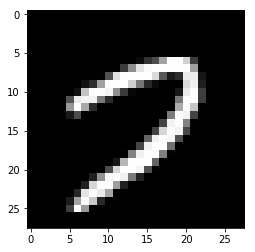

In [4]:
X = X.reshape([28, 28]);

plt.gray()
#print(batch_ys)
plt.imshow(X)


In [5]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

# 0.5 is a learning rate for Gradient Descent Optimizer
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

#a TensorFlow Session (We are in an interactive session)
sess = tf.InteractiveSession()


Instructions for updating:
Use tf.cast instead.


In [7]:
tf.global_variables_initializer().run()


In [8]:
for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})


In [9]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))


In [10]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


In [11]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))


0.9184
